In [ ]:
# question 1 - Load the dataset and display its first 10 rows. 
import pandas as pd 
import numpy as np
import seaborn as sn
path ="employee_salary_data.csv"
dataset = pd.read_csv(path)
dataset.head(10)


,Employee_ID,Age,Gender,Education_Level,Work_Experience,Job_Title,Department,Monthly_Salary,Performance_Score,Remote_Work_Percentage,City
0,1001,50,Male,Bachelor,9,Manager,Marketing,80000.0,8,25,Nakuru
1,1002,36,Female,Bachelor,16,Data Scientist,Operations,69000.0,9,25,Eldoret
2,1003,29,Female,Bachelor,9,Analyst,Marketing,48000.0,3,0,Kisumu
3,1004,42,Female,Bachelor,16,Consultant,Finance,91000.0,10,0,Kisumu
4,1005,40,Female,Bachelor,19,Manager,Finance,64000.0,3,25,Nairobi
5,1006,44,Male,Bachelor,23,Analyst,IT,76000.0,3,0,Nairobi
6,1007,32,Female,Master,4,Manager,Operations,86000.0,6,25,Nakuru
7,1008,32,Female,Diploma,33,Engineer,Marketing,38000.0,1,50,Nakuru
8,1009,45,Male,Bachelor,5,Consultant,HR,43000.0,7,25,Mombasa
9,1010,57,Male,PhD,1,Analyst,Finance,74000.0,1,25,Nakuru


In [ ]:
# Check for missing values and duplicates.
dataset.duplicated().sum()


np.int64(0)

In [ ]:
dataset.isnull().sum()

Employee_ID               0
Age                       0
Gender                    0
Education_Level           0
Work_Experience           0
Job_Title                 0
Department                0
Monthly_Salary            0
Performance_Score         0
Remote_Work_Percentage    0
City                      0
dtype: int64

In [ ]:
#Remove any missing and duplicate employee records
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.shape

(200, 11)

In [ ]:
# mean
mean_salary = dataset["Monthly_Salary"].mean()
print("Mean :",mean_salary)

Mean : 81770.0


In [ ]:
# median
median_salary = dataset["Monthly_Salary"].median()
print("Median :",median_salary)

Median : 81000.0


In [ ]:
# mode
mode_salary = dataset["Monthly_Salary"].mode()[0]
print("Mode :",mode_salary)

Mode : 78000.0


In [ ]:
# standard deviation
std_salary = dataset["Monthly_Salary"].std()
print("Standard Deviation Salary :",std_salary)

Standard Deviation Salary : 18635.00515388786


In [ ]:
mean_age = dataset["Age"].mean()
print("Mean Age :",mean_age)

Mean Age : 40.17


In [ ]:
median_age = dataset["Age"].median()
print("Median :",median_age)

Median : 41.0


In [ ]:
mode_age = dataset["Age"].mode()[0]
print("Mode :",mode_age) 

Mode : 45


In [ ]:
std_age = dataset["Age"].std()
print("Standard Deviation:",std_age)

Standard Deviation: 11.242020062042979


In [ ]:
summary = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Mode", "Standard Deviation"],
    "Monthly_Salary": [mean_salary, median_salary, mode_salary, std_salary],
    "Age": [mean_age, median_age, mode_age, std_age]
})
display(summary)
print(""" \n
Interpretation:
- The mean and median salaries show whether the distribution is symmetric or skewed.
- If the mean > median, salaries are likely right-skewed (a few high earners).
- The same logic applies for age — comparing mean and median reveals whether most employees are young or older.
\n
""")

,Statistic,Monthly_Salary,Age
0,Mean,81770.000000,40.17000
1,Median,81000.000000,41.00000
2,Mode,78000.000000,45.00000
3,Standard Deviation,18635.005154,11.24202


 

Interpretation:
- The mean and median salaries show whether the distribution is symmetric or skewed.
- If the mean > median, salaries are likely right-skewed (a few high earners).
- The same logic applies for age — comparing mean and median reveals whether most employees are young or older.





In [ ]:
corr = dataset["Work_Experience"].corr(dataset["Monthly_Salary"])
if corr>0:
    print("Positive Correlation")
elif corr<0:
    print("Negative Correlation")
else:
    print("No correlation")

Positive Correlation


In [ ]:
salary_by_gender = pd.pivot_table(
    dataset,
    values='Monthly_Salary',
    index='Gender',
    aggfunc=['mean', 'median', 'count']
).round(2)

salary_by_gender.columns = ['Average_Salary', 'Median_Salary', 'Employee_Count']
display(salary_by_gender)


,Average_Salary,Median_Salary,Employee_Count
Gender,,,
Female,83239.13,82500.0,92
Male,79229.17,78000.0,96
Other,90833.33,89500.0,12


In [ ]:
import pandas as pd 
path ="employee_salary_data.csv"
dataset = pd.read_csv(path)
city_performance = dataset.groupby("City")["Performance_Score"].mean().sort_values(ascending=False).round()
top_city = city_performance.index[0]
print(f"\n City with the highest average performance score: {top_city} \n")


 City with the highest average performance score: Nairobi 



In [ ]:
display(city_performance.head(10))

City
Nairobi    6.0
Mombasa    5.0
Nakuru     5.0
Eldoret    5.0
Kisumu     5.0
Name: Performance_Score, dtype: float64

/tmp/ipykernel_45138/138118693.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


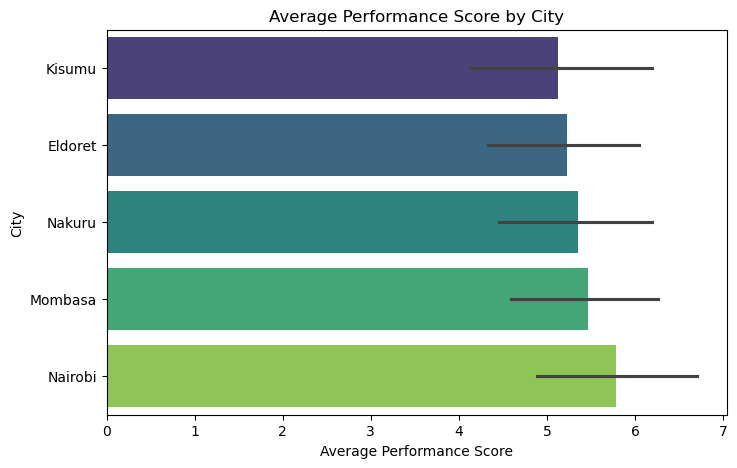

In [ ]:
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=dataset,
    x="Performance_Score",
    y="City",
    estimator=np.mean,
    order=dataset.groupby("City")["Performance_Score"].mean().sort_values().index,
    palette="viridis"
)
plt.title("Average Performance Score by City")
plt.xlabel("Average Performance Score")
plt.ylabel("City")
plt.show()


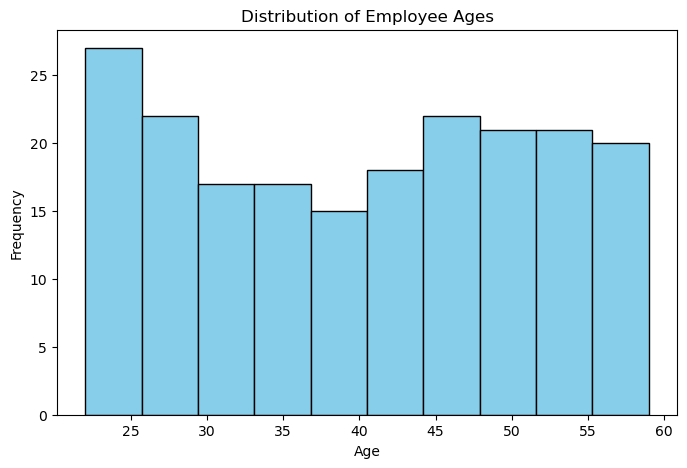

The histogram is roughly shaped thus it is normally distributed.


In [ ]:
plt.figure(figsize=(8,5))
plt.hist(dataset["Age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Employee Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print("The histogram is roughly shaped thus it is normally distributed.")

In [ ]:
avg_salary_dept = dataset.groupby("Department")["Monthly_Salary"].mean().sort_values(ascending=False)

/tmp/ipykernel_45138/3018377424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_dept.index, y=avg_salary_dept.values, palette="coolwarm")


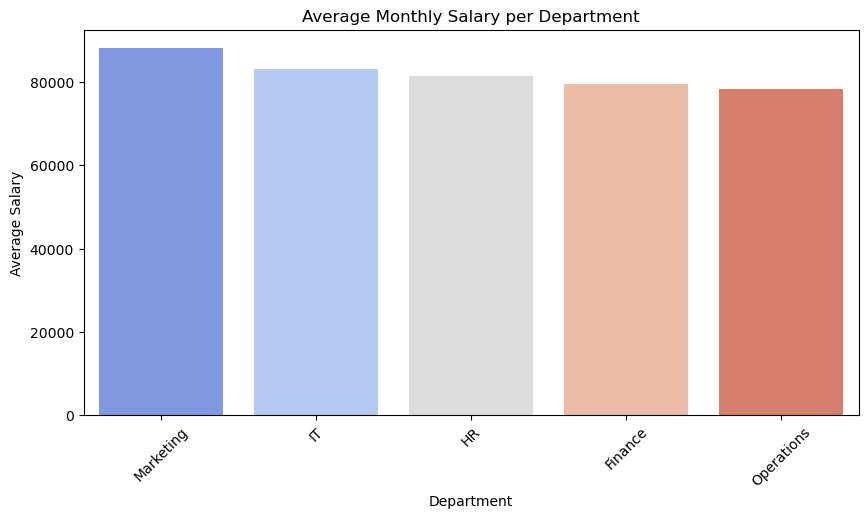

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_salary_dept.index, y=avg_salary_dept.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Monthly Salary per Department")
plt.ylabel("Average Salary")
plt.xlabel("Department")
plt.show()

/tmp/ipykernel_45138/2821169898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education_Level", y="Monthly_Salary", data=dataset, palette="pastel")


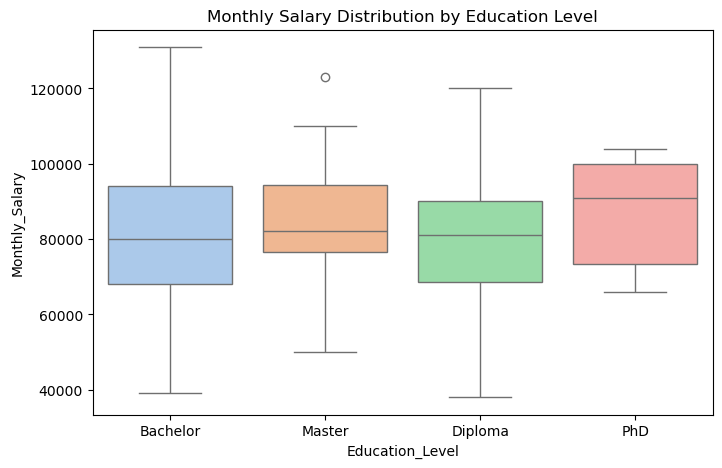

If higher education levels correspond to higher median salaries 
 then education positively influences earning potential


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Education_Level", y="Monthly_Salary", data=dataset, palette="pastel")
plt.title("Monthly Salary Distribution by Education Level")
plt.show()
print("If higher education levels correspond to higher median salaries \n then education positively influences earning potential")

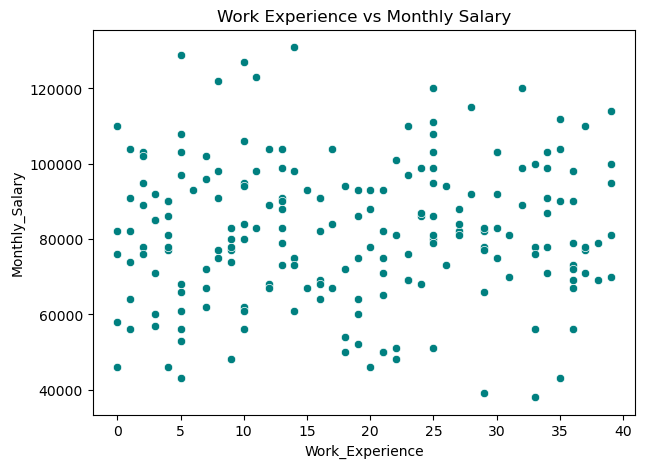

A positive upward trend → more experience generally leads to higher salary.
 A flat or random scatter → little to no relationship between the two.


In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Work_Experience", y="Monthly_Salary", data=dataset, color="teal")
plt.title("Work Experience vs Monthly Salary")
plt.show()
print("A positive upward trend more experience generally leads to higher salary.\n A flat or random scatter → little to no relationship between the two.")